In [17]:
from sola.main_classes import spaces
from sola.main_classes import domains
from sola.main_classes import functions
from sola.main_classes import mappings
import matplotlib.pyplot as plt
import seaborn as sns

# Create color Palette
colors = sns.color_palette('YlGnBu', n_colors=100)

# Subspaces and projections

In this Jupyter Notebook we describe how to create a linear subspace and how to project elements onto the subspace. 

We start by creating a PCb (piece-wise continuous and bounded) space with functions defined on [-1, 1].

In [18]:
domain = domains.HyperParalelipiped([[-1, 1]])
M = spaces.PCb(domain=domain)

Then we create a set of basis functions $B_i$ that will form the basis of our subspace. In this case we use Fourier basis functions (plotted below). You can adjust the maximum degree.

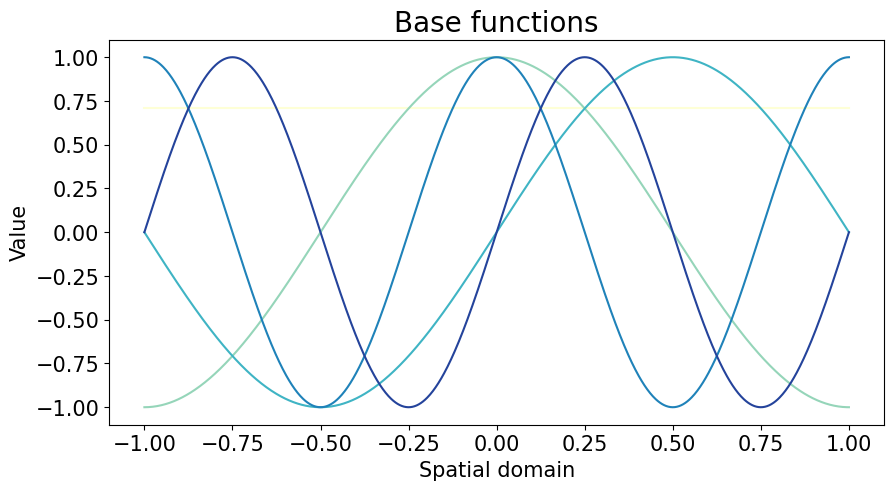

In [19]:
%matplotlib inline
########################
# Create basis functions
########################
# Edit region---------------------------------------------------------
# Maximum Fourier order
max_order = 3
# Edit region---------------------------------------------------------

base_functions = []
plt.figure(figsize=(10, 5))
base_functions.append(functions.Fourier(domain=domain, type='cos', order=0))
plt.plot(domain.mesh,
         base_functions[0].evaluate(domain.mesh),
         color=colors[0])
for index in range(1, max_order):
    base_functions.append(functions.Fourier(domain=domain, type='cos', order=index))
    base_functions.append(functions.Fourier(domain=domain, type='sin', order=index))
    plt.plot(domain.mesh,
             base_functions[2 * index - 1].evaluate(domain.mesh),
             color=colors[int(100 * (2 * index) / (2 * max_order))])
    plt.plot(domain.mesh,
             base_functions[2 * index].evaluate(domain.mesh),
             color=colors[int(100 * (2 * index + 1) / (2 * max_order))])
plt.title('Base functions', fontsize=20)
plt.xlabel('Spatial domain', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We now use the *Subspace* class from the spaces module to create a subspace of the space M equal to the span of the basis functions created above. 

In [20]:
subspace = spaces.Subspace(space=M, basis=base_functions)

Just like with any other space, we can draw random elements from our subspace. 

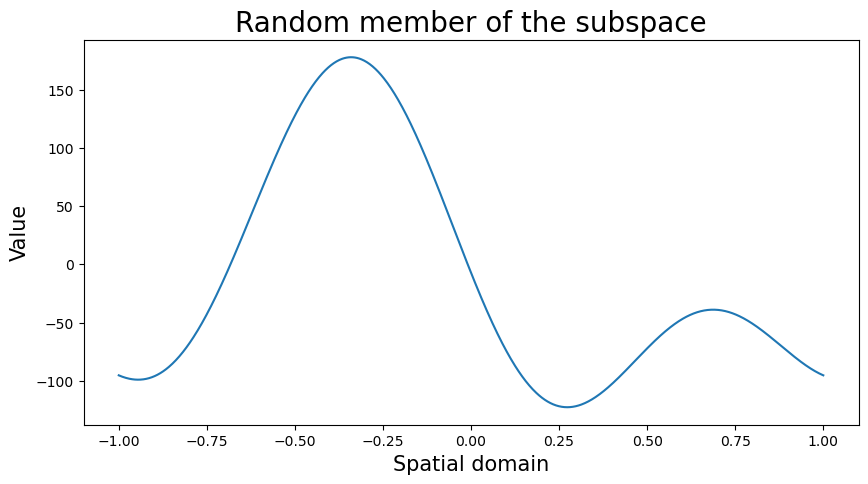

In [21]:
# Random member of the subspace
random_member = subspace.random_member(seed=1)
fig = plt.figure(figsize=(10, 5))
plt.plot(domain.mesh, random_member.evaluate(domain.mesh))
plt.title('Random member of the subspace', fontsize=20)
plt.xlabel('Spatial domain', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

In order to project members of M onto our subspace, we need to create a *Projection* object. The codomain is the subspace and the domain is the space in which the subspace is part of.

In [22]:
projection = mappings.Projection(domain=M, codomain=subspace)

We can then map the random member through the projection. In this case, since the random member is already part of the subspace, projecting it will keep the member unchanged

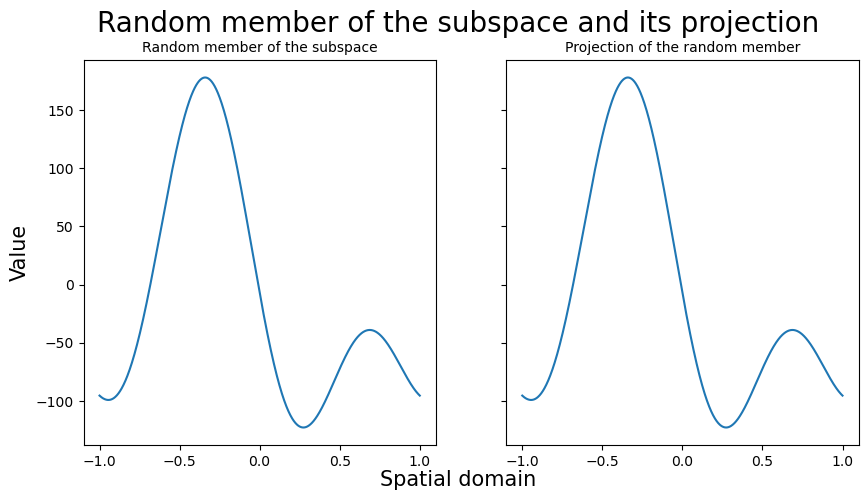

In [30]:
random_member_projected = projection.map(random_member)
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharex=True, sharey=True)
axs[0].plot(domain.mesh, random_member.evaluate(domain.mesh))
axs[1].plot(domain.mesh, random_member_projected.evaluate(domain.mesh))
axs[0].set_title('Random member of the subspace', fontsize=10)
axs[1].set_title('Projection of the random member', fontsize=10)
plt.suptitle('Random member of the subspace and its projection', fontsize=20)
fig.text(0.5, 0.04, 'Spatial domain', ha='center', va='center', fontsize=15)
axs[0].set_ylabel('Value', fontsize=15)
plt.show()

If the funciton being projected is not already in the subspace, then projecting it will remove the parts perpendicular to the subspace. 

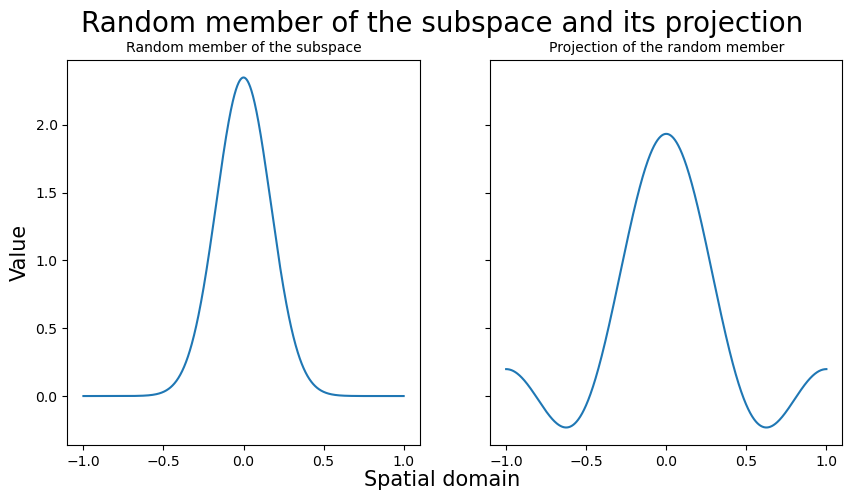

In [31]:
member_of_M = functions.Gaussian_1D(domain=domain, center=0, width=1)
member_of_M_projected = projection.map(member_of_M)
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharex=True, sharey=True)
axs[0].plot(domain.mesh, member_of_M.evaluate(domain.mesh))
axs[1].plot(domain.mesh, member_of_M_projected.evaluate(domain.mesh))
axs[0].set_title('Random member of the subspace', fontsize=10)
axs[1].set_title('Projection of the random member', fontsize=10)
plt.suptitle('Random member of the subspace and its projection', fontsize=20)
fig.text(0.5, 0.04, 'Spatial domain', ha='center', va='center', fontsize=15)
axs[0].set_ylabel('Value', fontsize=15)
plt.show()

We can also compute the gram matrix of our linear  subspace, which is mathematically defined as:
$$ G_{ij} = \left< B_i, B_j \right>_{M}$$
In our case the Fourier basis functions are orthonormal, which means that $G$ is simply the identity matrix.

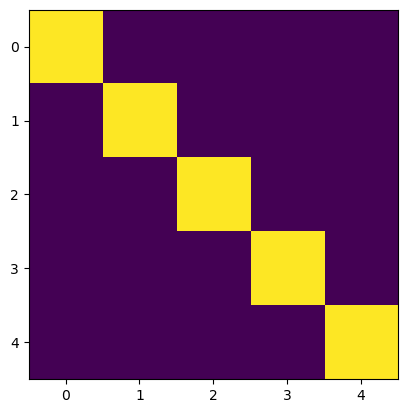

In [24]:
plt.imshow(projection.gram_matrix.matrix)